# Non Normed

In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import reader as _reader
from src import visualization as _visualization
import numpy as np
import sklearn
from sklearn.cluster import KMeans


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
X = _reader.readBOW(normed=False)
print(X[:10])
print(X.shape)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']
   0     1     2     3     4     5     6     7     8     9     ...   1193  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
6   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
7   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
9   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   

   1194  1195  1196  1197  1198  1199      1200  1201  1202  
0   0.0

## Creating a Dendogram
We are using lastP as metric for the linkage method: 

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

`https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html`

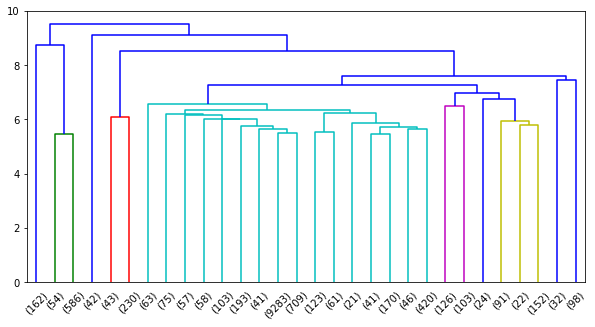

In [3]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(X)

## Selecting the Cut 
Based on the above dendogram we will put a cut off line. 
`max_d = 5`

In [4]:
reload(_optimizer)
clusters = _optimizer.fcluster_cut(X, max_d=5)
clusters.shape, np.unique(clusters)

((13229,),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
       dtype=int32))